In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/MyDrive/MyDrive/accident.csv")

<ipython-input-23-57d27085a1f5>:1: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/MyDrive/MyDrive/accident.csv")


In [ ]:
accident_df_2020 = df[df['accident_year'] == 2020]
accident_df_2020.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
370153,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
370154,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
370155,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
370156,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
370157,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
accident_df_2020.isna().sum()

,0
accident_index,0
accident_year,0
accident_reference,0
location_easting_osgr,14
location_northing_osgr,14
longitude,14
latitude,14
police_force,0
accident_severity,0
number_of_vehicles,0


In [ ]:
accident_df_2020.dropna(inplace=True)

<ipython-input-26-06dace1b19fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_2020.dropna(inplace=True)


In [ ]:
# List of columns to fill "-1" with the mode
columns_to_fill = [
    'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions',
    'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
    'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag','local_authority_district'
]

# Iterate through each column and fill "-1" values with the mode
for column in columns_to_fill:
    mode_value = accident_df_2020[column].mode()[0]
    accident_df_2020[column] = accident_df_2020[column].replace(-1, mode_value)

# Check the changes
accident_df_2020.head()

<ipython-input-27-848ba157f55f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_2020[column] = accident_df_2020[column].replace(-1, mode_value)
<ipython-input-27-848ba157f55f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_2020[column] = accident_df_2020[column].replace(-1, mode_value)
<ipython-input-27-848ba157f55f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
370153,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
370154,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
370155,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
370156,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
370157,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
# select the numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                461352 non-null  int64  
 1   location_easting_osgr                        461236 non-null  float64
 2   location_northing_osgr                       461236 non-null  float64
 3   longitude                                    461226 non-null  float64
 4   latitude                                     461226 non-null  float64
 5   police_force                                 461352 non-null  int64  
 6   accident_severity                            461352 non-null  int64  
 7   number_of_vehicles                           461352 non-null  int64  
 8   number_of_casualties                         461352 non-null  int64  
 9   day_of_week                                  461352 non-nul

In [ ]:
numeric_df = numeric_df.dropna(inplace=True)


In [ ]:
# Select relevant columns
accident_df_2020 = accident_df_2020[['day_of_week', 'weather_conditions', 'light_conditions',
         'road_surface_conditions','longitude', 'latitude','speed_limit','road_type','carriageway_hazards','lsoa_of_accident_location','accident_severity']]

In [ ]:
# List of LSOA codes for Kingston upon Hull, Humberside, and the East Riding of Yorkshire
lsoa_codes = ['E01013136', 'E01013137', 'E01013138']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Filter the data for the specified regions
filtered_df = accident_df_2020[accident_df_2020['lsoa_of_accident_location'].isin(lsoa_codes)]
filtered_df.head()

,day_of_week,weather_conditions,light_conditions,road_surface_conditions,longitude,latitude,speed_limit,road_type,carriageway_hazards,lsoa_of_accident_location,accident_severity
407975,7,1,4,2,-0.064763,53.574996,30,6,0,E01013136,3
408045,5,1,1,1,-0.057671,53.573542,30,6,0,E01013136,3
408136,2,4,1,1,-0.065336,53.574026,30,3,0,E01013136,3
408346,5,1,1,1,-0.075957,53.567302,30,6,0,E01013137,3
408437,2,9,1,1,-0.073298,53.572644,30,6,0,E01013137,2


In [ ]:
# Define the features for clustering (latitude and longitude for spatial clustering)
coordinates = filtered_df[['latitude', 'longitude']]

In [ ]:
# MinMax scaling the data
scaler = MinMaxScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

In [ ]:
# Apply DBSCAN for clustering
db = DBSCAN(eps=0.1, min_samples=10).fit(scaled_coordinates)
filtered_df.loc[:, 'cluster'] = db.labels_

# Characterize the clusters (excluding non-numeric columns from mean calculation)
numeric_columns = filtered_df.select_dtypes(include=['number', 'float']).columns
cluster_analysis = filtered_df.groupby('cluster')[numeric_columns].mean()
cluster_analysis

<ipython-input-36-3ec1c5c1c0d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'cluster'] = db.labels_


,day_of_week,weather_conditions,light_conditions,road_surface_conditions,longitude,latitude,speed_limit,road_type,carriageway_hazards,accident_severity,cluster
cluster,,,,,,,,,,,
-1,4.882353,1.882353,1.705882,1.117647,-0.068728,53.572562,30.0,4.588235,0.0,2.823529,-1.0


<ipython-input-37-b8864a7b82da>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-37-b8864a7b82da>:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf['cluster'] != -1].plot(ax=ax, column='cluster', legend=True, cmap='viridis', markersize=10, alpha=0.6)


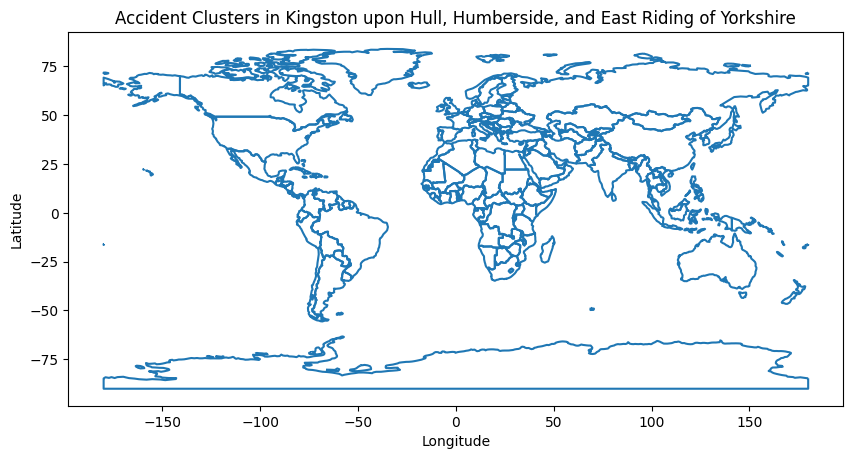

In [ ]:
# Visual representation of clusters on a map
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax)
gdf[gdf['cluster'] != -1].plot(ax=ax, column='cluster', legend=True, cmap='viridis', markersize=10, alpha=0.6)
plt.title('Accident Clusters in Kingston upon Hull, Humberside, and East Riding of Yorkshire')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Select relevant columns
accident_model_df = accident_df_2020[['day_of_week', 'weather_conditions', 'light_conditions',
         'road_surface_conditions','speed_limit','road_type','carriageway_hazards','accident_severity']]
accident_model_df.head()

,day_of_week,weather_conditions,light_conditions,road_surface_conditions,speed_limit,road_type,carriageway_hazards,accident_severity
370153,3,9,1,9,20,6,0,3
370154,2,1,1,1,20,6,0,3
370155,4,1,4,2,30,6,0,3
370156,4,1,4,1,30,6,0,2
370157,4,1,4,1,30,6,0,3


In [ ]:
# Replace 2 and 3 with 0 in the 'accident_severity' column
accident_model_df['accident_severity'] = accident_model_df['accident_severity'].replace({2: 0, 3: 0})
accident_model_df.head()

<ipython-input-39-3ecb6b50d3ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_model_df['accident_severity'] = accident_model_df['accident_severity'].replace({2: 0, 3: 0})


,day_of_week,weather_conditions,light_conditions,road_surface_conditions,speed_limit,road_type,carriageway_hazards,accident_severity
370153,3,9,1,9,20,6,0,0
370154,2,1,1,1,20,6,0,0
370155,4,1,4,2,30,6,0,0
370156,4,1,4,1,30,6,0,0
370157,4,1,4,1,30,6,0,0


# **Apriori Algorithm Analysis**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import IsolationForest


In [ ]:
# Step 1: Convert 'accident_severity' to binary values (1 for fatal, 0 for others)
accident_model_df['accident_severity'] = accident_model_df['accident_severity'].replace({2: 0, 3: 0})

# Step 2: Convert categorical columns to one-hot encoding
categorical_columns = [
    'day_of_week', 'weather_conditions', 'light_conditions',
    'road_surface_conditions', 'speed_limit', 'road_type', 'carriageway_hazards'
]

df_one_hot = pd.get_dummies(accident_model_df, columns=categorical_columns, drop_first=True)

# Step 3: Ensure DataFrame contains only boolean or binary values
for column in df_one_hot.columns:
    if df_one_hot[column].dtype != 'bool' and df_one_hot[column].dtype != 'int64':
        df_one_hot[column] = df_one_hot[column].astype('bool')

# Display the resulting DataFrame
df_one_hot



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-a61183f96b26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_model_df['accident_severity'] = accident_model_df['accident_severity'].replace({2: 0, 3: 0})


,accident_severity,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,weather_conditions_2,weather_conditions_3,weather_conditions_4,...,road_type_3,road_type_6,road_type_7,road_type_9,carriageway_hazards_1,carriageway_hazards_2,carriageway_hazards_3,carriageway_hazards_6,carriageway_hazards_7,carriageway_hazards_9
370153,0,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
370154,0,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
370155,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
370156,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
370157,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
461348,0,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
461349,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
461350,0,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Step 4: Apply apriori algorithm
frequent_itemsets = apriori(df_one_hot, min_support=0.10, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the resulting frequent itemsets and rules
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.140067,(day_of_week_2)
1,0.145484,(day_of_week_3)
2,0.148698,(day_of_week_4)
3,0.154126,(day_of_week_5)
4,0.163251,(day_of_week_6)
5,0.135263,(day_of_week_7)
6,0.127006,(weather_conditions_2)
7,0.208642,(light_conditions_4)
8,0.287745,(road_surface_conditions_2)
9,0.57323,(speed_limit_30)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(day_of_week_3),(road_type_6),0.145484,0.733882,0.106980,0.735338,1.001985,0.000212,1.005504,0.002318
1,(road_type_6),(day_of_week_3),0.733882,0.145484,0.106980,0.145773,1.001985,0.000212,1.000338,0.007444
2,(day_of_week_5),(road_type_6),0.154126,0.733882,0.113330,0.735307,1.001942,0.000220,1.005384,0.002291
3,(road_type_6),(day_of_week_5),0.733882,0.154126,0.113330,0.154425,1.001942,0.000220,1.000354,0.007282
4,(day_of_week_6),(road_type_6),0.163251,0.733882,0.120700,0.739352,1.007455,0.000893,1.020989,0.008843
5,(road_type_6),(day_of_week_6),0.733882,0.163251,0.120700,0.164467,1.007455,0.000893,1.001457,0.027805
6,(day_of_week_7),(road_type_6),0.135263,0.733882,0.100170,0.740555,1.009093,0.000903,1.025720,0.010420
7,(road_type_6),(day_of_week_7),0.733882,0.135263,0.100170,0.136493,1.009093,0.000903,1.001424,0.033860
8,(road_surface_conditions_2),(weather_conditions_2),0.287745,0.127006,0.122378,0.425299,3.348666,0.085832,1.519042,0.984722
9,(weather_conditions_2),(road_surface_conditions_2),0.127006,0.287745,0.122378,0.963561,3.348666,0.085832,19.546513,0.803411


In [ ]:
# Top 5 based on zhangs_metric
rules.sort_values(by='zhangs_metric', ascending=False, inplace=True)
top_itemset = rules.head(5)
top_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(road_surface_conditions_2),(weather_conditions_2),0.287745,0.127006,0.122378,0.425299,3.348666,0.085832,1.519042,0.984722
9,(weather_conditions_2),(road_surface_conditions_2),0.127006,0.287745,0.122378,0.963561,3.348666,0.085832,19.546513,0.803411
15,(road_type_6),(speed_limit_60),0.733882,0.125053,0.112266,0.152976,1.223285,0.020492,1.032965,0.685893
19,(speed_limit_30),"(light_conditions_4, road_type_6)",0.573230,0.145682,0.112025,0.195428,1.341468,0.028516,1.061829,0.596453
10,(speed_limit_30),(light_conditions_4),0.573230,0.208642,0.141613,0.247044,1.184059,0.022013,1.051002,0.364242


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-0660ebcc503f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='viridis')


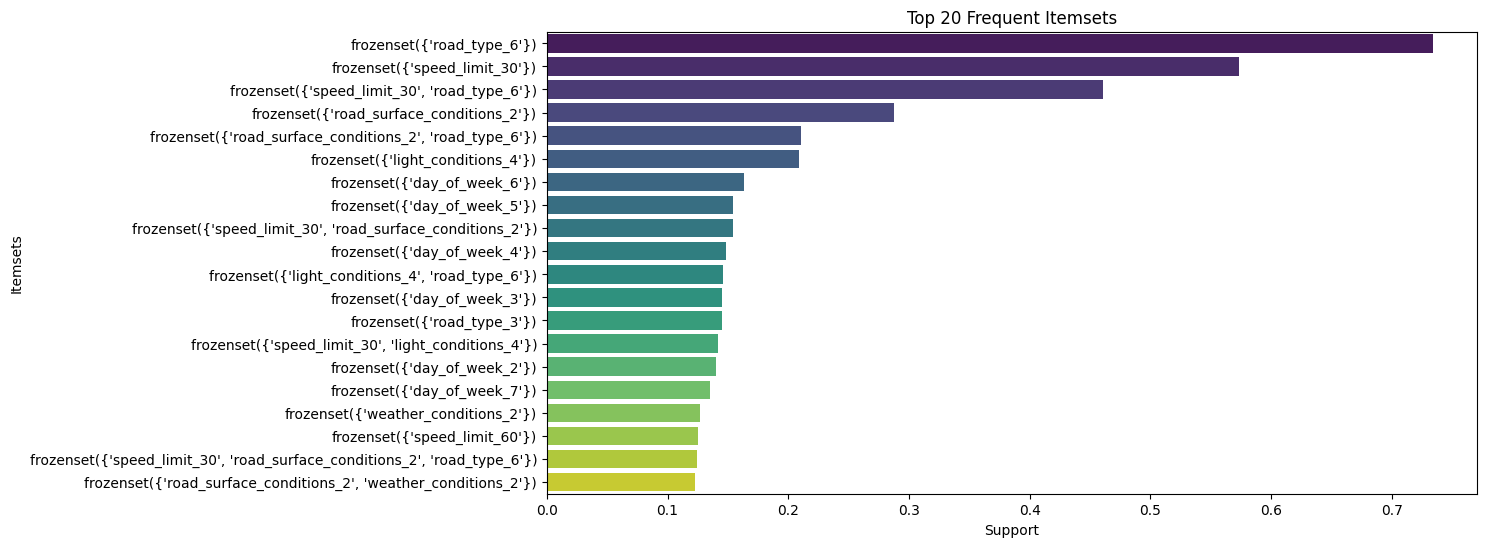

In [ ]:
#Visualize Frequent Itemsets
plt.figure(figsize=(12, 6))
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
top_itemsets = frequent_itemsets.head(20)  # Adjust number of top itemsets to display
sns.barplot(x='support', y='itemsets', data=top_itemsets, palette='viridis')
plt.title('Top 20 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


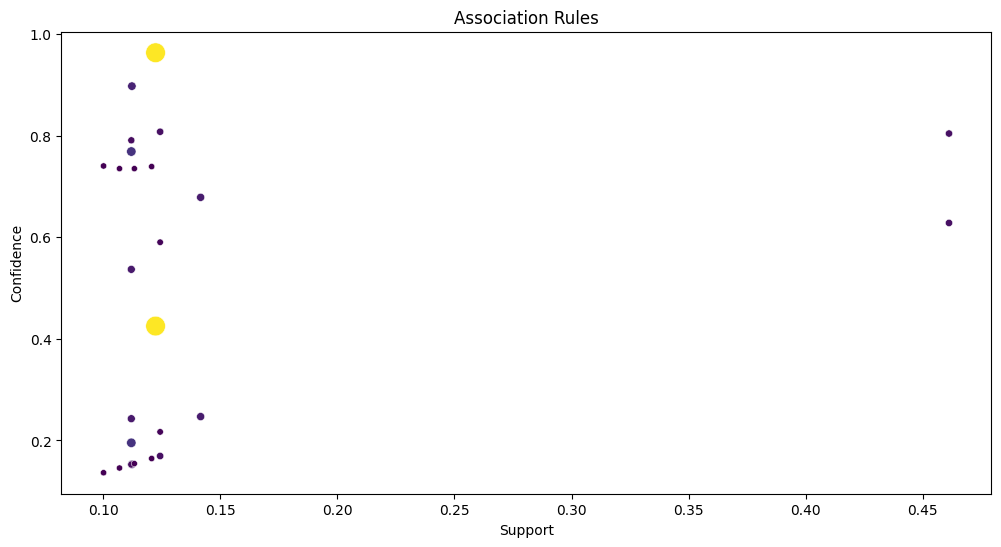

In [ ]:
#Visualize Association Rules
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', legend=False, sizes=(20, 200))
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

#**Outlier Detection**

In [ ]:
# Outlier detection using Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
accident_model_df['anomaly'] = iso.fit_predict(accident_model_df[categorical_columns])
outliers = accident_model_df[accident_model_df['anomaly'] == -1]
outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-7a6111a238a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_model_df['anomaly'] = iso.fit_predict(accident_model_df[categorical_columns])


,day_of_week,weather_conditions,light_conditions,road_surface_conditions,speed_limit,road_type,carriageway_hazards,accident_severity,anomaly
370186,4,9,4,9,20,2,0,0,-1
370302,7,8,4,1,20,7,9,0,-1
370307,7,2,7,9,30,9,9,0,-1
370371,2,9,1,9,30,9,9,0,-1
370458,3,9,4,9,20,6,9,0,-1
...,...,...,...,...,...,...,...,...,...
457970,1,5,6,2,60,6,7,0,-1
458149,7,6,6,3,70,3,3,0,-1
458676,6,2,6,2,70,3,7,0,-1
460027,2,7,6,2,60,6,6,1,-1
